In [1]:
import torch
import torch.nn as nn
import torch.optim as optim  # obtenemos calculo de errores
from torchvision import utils
from torchvision import datasets
from torchvision import transforms
from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

# Construyendo un modelo

In [2]:
data_path = 'data/'
mean = (0.4915, 0.4823, 0.4468)
std = (0.2470, 0.2435, 0.2616)
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean, std)
                                ]))
full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                                      transform=transforms.Compose([
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean, std)
                                      ]))

Files already downloaded and verified
Files already downloaded and verified


In [3]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

In [4]:
len(full_validation_set)

10000

In [5]:
len(full_data_set)

50000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


planes
deer
cat
dog


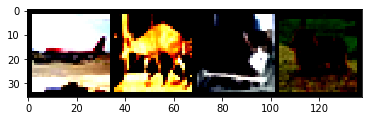

In [6]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()
classes = ['planes', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))
for i in range(size):
    print(classes[labels[i]])

In [7]:
class_names = ['car', 'cat']
label_map = {1: 0, 3: 1}
data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [8]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [9]:
model = nn.Sequential(
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2)
)

In [10]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [11]:
x = torch.tensor([1.0, 2.0, 3.0])

In [12]:
soft = softmax(x)
soft, soft.sum()

(tensor([0.0900, 0.2447, 0.6652]), tensor(1.))

In [13]:
model = nn.Sequential(
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

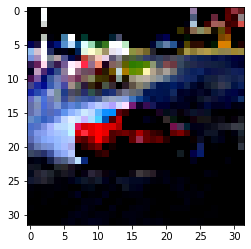

In [14]:
img, label = data_set[20]
plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [15]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.5112, 0.4888]], grad_fn=<SoftmaxBackward>)

In [16]:
_, index = torch.max(out, dim=1)

In [17]:
print('->', class_names[label], ' model:', class_names[index])

-> car  model: car


# Implementando un clasificador totalmente conectado

In [18]:
model = nn.Sequential(
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)
lass_function = nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

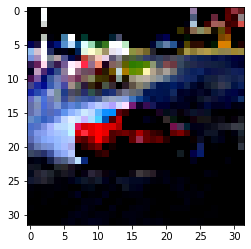

In [20]:
img, label = data_set[20]
plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [21]:
out = model(img.view(-1).unsqueeze(0))
print(out)
print('->', class_names[label], ' model:', class_names[index])

tensor([[-0.7216, -0.6655]], grad_fn=<LogSoftmaxBackward>)
-> car  model: car


In [23]:
model = nn.Sequential(
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 5
for epoch in range(n_epochs):
    for img, label in data_set:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_function(out, torch.tensor([label]))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch: {epoch}, Loss: {float(loss)}')

Epoch: 0, Loss: 0.0011872155591845512
Epoch: 1, Loss: 0.07186727225780487
Epoch: 2, Loss: 0.48163360357284546
Epoch: 3, Loss: 0.0066549573093652725
Epoch: 4, Loss: 0.06309013813734055


In [24]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)
model = nn.Sequential(
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 100
for epoch in range(n_epochs):
    for img, label in train_loader:
        out = model(img.view(img.shape[0], -1))
        loss = loss_function(out, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch: {epoch}, Loss: {float(loss)}')

Epoch: 0, Loss: 0.4791274070739746
Epoch: 1, Loss: 0.2144928127527237
Epoch: 2, Loss: 0.26300597190856934
Epoch: 3, Loss: 0.4268561601638794
Epoch: 4, Loss: 0.5575602650642395
Epoch: 5, Loss: 0.26792019605636597
Epoch: 6, Loss: 0.4262995719909668
Epoch: 7, Loss: 0.22289925813674927
Epoch: 8, Loss: 0.22629135847091675
Epoch: 9, Loss: 0.6511796116828918
Epoch: 10, Loss: 0.29538393020629883
Epoch: 11, Loss: 0.1409776210784912
Epoch: 12, Loss: 0.3999505043029785
Epoch: 13, Loss: 0.18031740188598633
Epoch: 14, Loss: 0.14219370484352112
Epoch: 15, Loss: 0.2915889024734497
Epoch: 16, Loss: 0.2373466193675995
Epoch: 17, Loss: 0.2170676589012146
Epoch: 18, Loss: 0.3028430640697479
Epoch: 19, Loss: 0.12499549239873886
Epoch: 20, Loss: 0.2615547776222229
Epoch: 21, Loss: 0.1612151712179184
Epoch: 22, Loss: 0.07355406880378723
Epoch: 23, Loss: 0.08102864027023315
Epoch: 24, Loss: 0.11338822543621063
Epoch: 25, Loss: 0.07410069555044174
Epoch: 26, Loss: 0.38276100158691406
Epoch: 27, Loss: 0.078714

In [25]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print(f"Accuracy: {correct / total}")

Accuracy: 0.868


In [27]:
img, label = validation_set[20]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
out

tensor([[-1.4067e-05, -1.1169e+01]], grad_fn=<LogSoftmaxBackward>)

->:  car  model: car


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


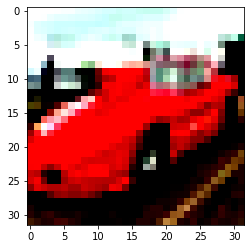

In [28]:
print('->: ', class_names[label], ' model:', class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

# Mejoras, limitaciones y concluciones

In [30]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)
model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2)
)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 100
for epoch in range(n_epochs):
    for img, label in train_loader:
        out = model(img.view(img.shape[0], -1))
        loss = loss_function(out, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch: {epoch}, Loss: {float(loss)}')

Epoch: 0, Loss: 0.4598587453365326
Epoch: 1, Loss: 0.38456660509109497
Epoch: 2, Loss: 0.47965189814567566
Epoch: 3, Loss: 0.24956542253494263
Epoch: 4, Loss: 0.17972975969314575
Epoch: 5, Loss: 0.4790491461753845
Epoch: 6, Loss: 0.30181533098220825
Epoch: 7, Loss: 0.3565053641796112
Epoch: 8, Loss: 0.19411757588386536
Epoch: 9, Loss: 0.320214182138443
Epoch: 10, Loss: 0.4191557466983795
Epoch: 11, Loss: 0.4710755944252014
Epoch: 12, Loss: 0.27521052956581116
Epoch: 13, Loss: 0.5222012400627136
Epoch: 14, Loss: 0.22001895308494568
Epoch: 15, Loss: 0.29205042123794556
Epoch: 16, Loss: 0.25628405809402466
Epoch: 17, Loss: 0.06873556226491928
Epoch: 18, Loss: 0.22997446358203888
Epoch: 19, Loss: 0.13968704640865326
Epoch: 20, Loss: 0.24427348375320435
Epoch: 21, Loss: 0.3343491554260254
Epoch: 22, Loss: 0.2886102497577667
Epoch: 23, Loss: 0.11626160144805908
Epoch: 24, Loss: 0.04215320572257042
Epoch: 25, Loss: 0.06260918080806732
Epoch: 26, Loss: 1.1271064281463623
Epoch: 27, Loss: 0.055

In [31]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print(f"Accuracy: {correct / total}")

Accuracy: 0.868


In [32]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in train_loaderloaderloader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print(f"Accuracy: {correct / total}")

Accuracy: 1.0


In [34]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct: car, model: cat


tensor([5.2212], grad_fn=<MaxBackward0>)

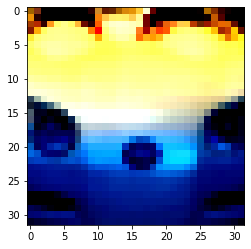

In [41]:
image = request.urlretrieve('https://i.pinimg.com/originals/43/bc/47/43bc47066bb8b2fa4fe7cc8e82cc3714.jpg','carcat.jpg')
img = Image.open(image[0])
preprocess = transforms.Compose([
    transforms.Resize(48),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=mean,
        std=std
    )
])
img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print(f'correct: car, model: {class_names[index]}')
plt.imshow(img_t.permute(1, 2, 0))
_